<h1>Escalado y normalización de datos</h1>
<p>Primero importamos las librerías que vamos a usar para el ejercicio</p>

In [116]:
#para el análisis de datos:
import pandas as pd
import numpy as np

#para transformaciones estadísticas:
from scipy import stats

#para escalar min_max de los datos:
from mlxtend.preprocessing import minmax_scaling
'''para instalar mlxtend en preprocessing:
!pip install mlxtend'''

#librerias para graficar:
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

<h2>Diferencia entre normalización y escalado(<i>scaling</i>)</h2>
<p>En ambos casos estaremos transformando los valores de variables numéricas para que los datos tengan propiedades útiles especificas. La diferencia radica en que:</p>
<ul>
    <li>En el <b>escalado de datos</b> estamos cambiando el <i>rango</i> de los datos</li>
    <li>En la <b>normalización</b> estamos cambiando <i>la forma de la distribución</i> de nuestros datos.</li>
</ul>
<h3>Escalado de datos (<i>scaling</i>)</h3>
<p> Significa que transformamos los datos para que se adapten a una escala especifica, cómo por ejemplo, 0-100, o 0-1.
    Vamos a querer escalar los datos cuando usemos métodos basados en medidas de que tan lejos esta el valor de un dato de otro, como por ejemplo, en los algoritmos <i>Support Vector Machine</i>(SVM) o <i>K-nearest neighbors</i>(KNN).

Escalar los datos nos puede ayudar a comparar diferentes variables en igualdad de condiciones.</p>

<h4>Escalado Min-Max</h4>
<p>Más información sobre el escalado <a href=http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/>Min-Max</a></p>

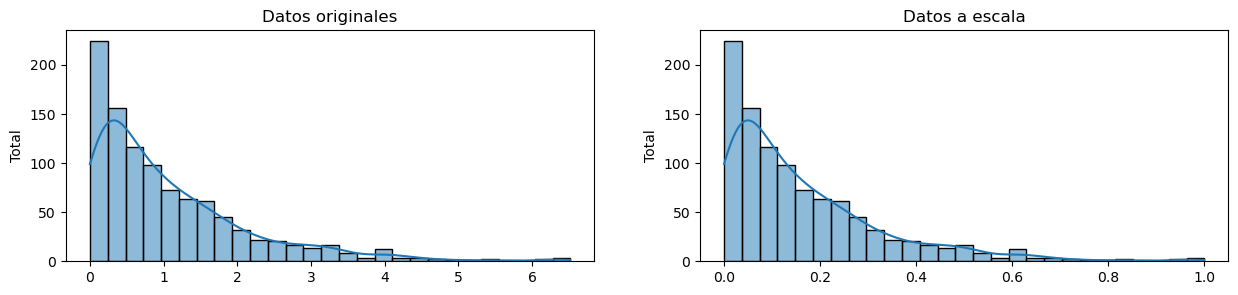

In [114]:
#Ejemplo para ayudar a solidificar el cómo se ve la escala.

#Generar 1000 datos extraídos aleatoriamente de una distribución exponencial
datos_originales = np.random.exponential(size=1000)

#Escalamos los datos usando la función min-max 
datos_escalados = minmax_scaling(datos_originales, columns=[0])



# Graficamos a ambos juntos para compararlos.

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(datos_originales, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos originales")
ax[0].set_ylabel("Total")

sns.histplot(datos_escalados, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos a escala")
ax[1].set_ylabel("Total")

plt.show()

· Notemos que la forma de los datos no cambian, pero en los datos escalados, en lugar de ir de 0 a 8, ahora su rango va del 0 al 1. 

<hr>
<h2> Normalización</h2>

<p>Al escalar los datos, solo se cambia el rango de estos. La <b>normalización</b> es una transformación más radical.<br>
El punto de la normalización es cambiar las observaciones para que puedan ser descritas como una
<i>distribución normal.</i></p>

    -Distribución normal-
    
    También conocida como "curva de campana", es una distribución estadística especifica donde observaciones casi iguales caen por debajo y por encima de la media.
    
    La media y la mediana son las mismas, y son mayores las observaciones cercanas a la media. La distribución normal también es conocida como distribución Gaussina.
    
<p> Generalmente vamos a querer normalizar los datos si vamos a usar machine learning o técnicas estadísticas que asuman
que los datos están distribuidos normalmente. Algunos ejemplos de estos incluyen <i>Linear Discriminant Analysis (LDA)</i> y <i>Gaussian Naive-Bayes</i>.</p>

<p>Uno de los métodos de normalización es la transformación Box-Cox. El siguiente es un ejemplo de esto.</p>

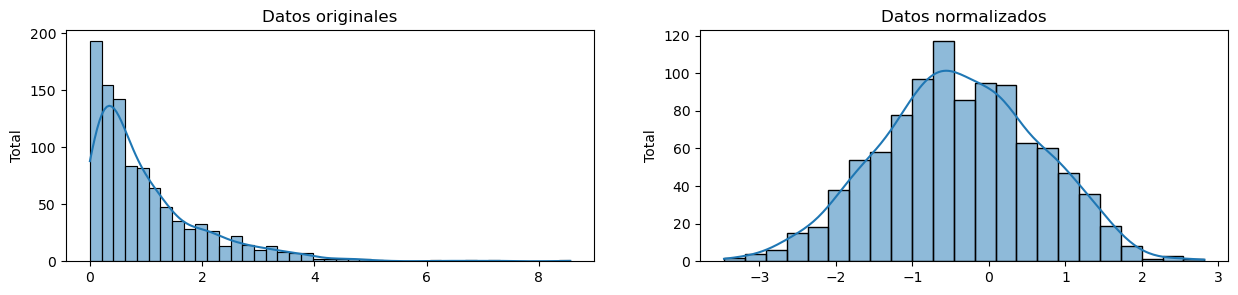

In [113]:
# Normalizamos los datos exponenciales con la transformación Box-Cox
datos_normalizados = stats.boxcox(datos_originales)

# Los graficamos juntos para compararlos.
fig, ax=plt.subplots(1, 2, figsize=(15, 3))


sns.histplot(datos_originales, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos originales")
ax[0].set_ylabel('Total')

sns.histplot(datos_normalizados[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos normalizados")
ax[1].set_ylabel('Total')

plt.show()

· Notemos que la forma de nuestros datos ha cambiado. Antes de la normalización, tenian una forma en L. Pero después de la normalización, ya tomo una forma "de campana".